## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
stroke_df = pd.read_csv('dataset/train.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [171]:
stroke_df.shape

(15304, 12)

In [3]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


*Dataset possui 15304 linhas e 12 colunas*

## Análise dos Dados

In [173]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


*Sem valores nulos no dataset*

## Ajustando tipo dos dados

In [4]:
colunas_para_converter_cat = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
stroke_df[colunas_para_converter_cat] = stroke_df[colunas_para_converter_cat].astype('category')
stroke_df['age'] = stroke_df['age'].astype('int64')

## Excluir a coluna id

In [5]:
stroke_df = stroke_df.drop(['id'], axis=1)

## Descrição geral dos dados

In [6]:
stroke_df.describe(include="all")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,15304,15304.000000,15304.000000,15304.000000,15304,15304,15304,15304.000000,15304.000000,15304,15304.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Rural,NaN,NaN,never smoked,NaN
freq,9446,NaN,NaN,NaN,10385,9752,7664,NaN,NaN,6281,NaN
mean,NaN,41.404012,0.049726,0.023327,NaN,NaN,NaN,89.039853,28.112721,NaN,0.041296
std,NaN,21.470463,0.217384,0.150946,NaN,NaN,NaN,25.476102,6.722315,NaN,0.198981
min,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,55.220000,10.300000,NaN,0.000000
25%,NaN,26.000000,0.000000,0.000000,NaN,NaN,NaN,74.900000,23.500000,NaN,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,NaN,NaN,85.120000,27.600000,NaN,0.000000
75%,NaN,57.000000,0.000000,0.000000,NaN,NaN,NaN,96.980000,32.000000,NaN,0.000000


In [177]:
stroke_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.404012,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.470463,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


## Correlação Pearson entre as colunas numéricas

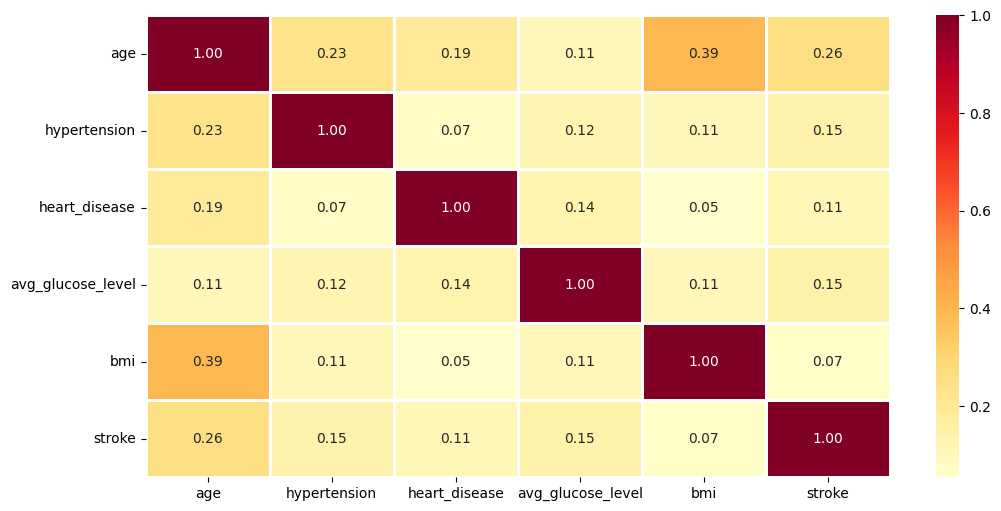

In [7]:
numeric_columns = stroke_df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_columns.corr(),
            cmap='YlOrRd',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()



## Distribuição das colunas numéricas

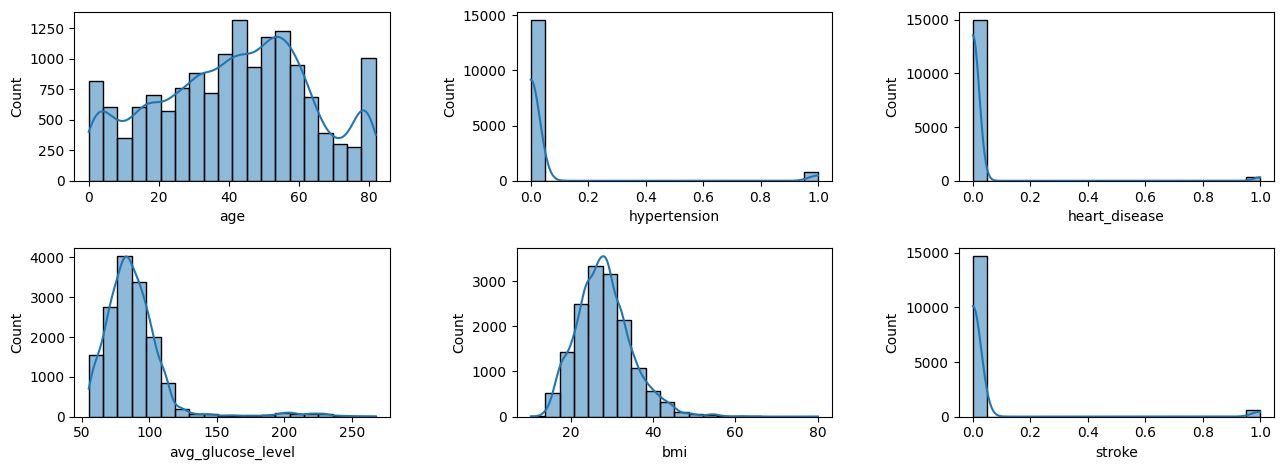

In [8]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.histplot(data=stroke_df, x=stroke_df[i], kde=True, bins=20) 
    number += 1
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()   

## Análise de Outliers

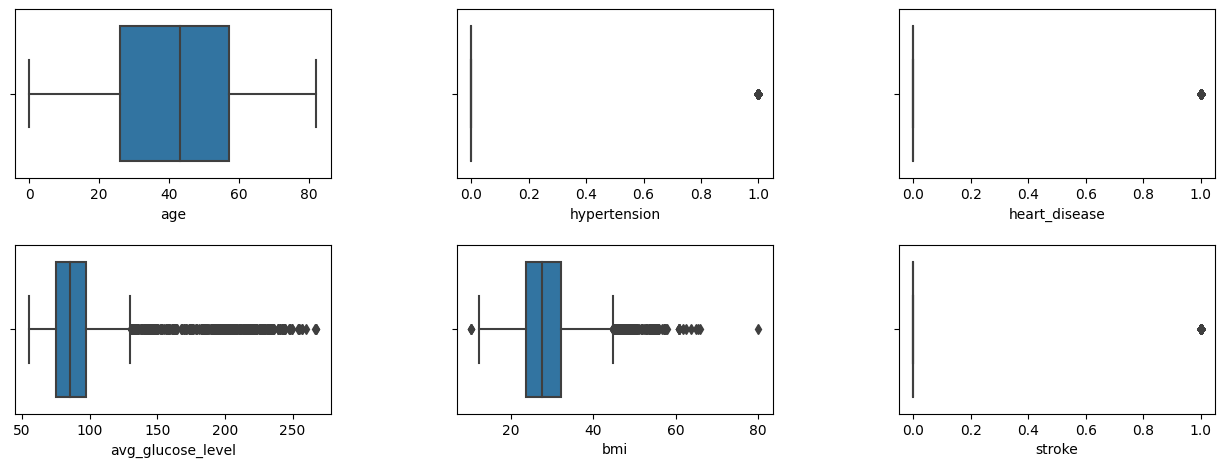

In [9]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.boxplot(x=i, data=stroke_df)
    number += 1
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()       
   

## Outliers Glicose

In [10]:
glucose = stroke_df['avg_glucose_level'].describe()[['mean','std','25%', '50%', '75%']].reset_index()
print(glucose)

  index  avg_glucose_level
0  mean          89.039853
1   std          25.476102
2   25%          74.900000
3   50%          85.120000
4   75%          96.980000


,Outliers
0,196
1,223
2,182
3,196
4,135
...,...
540,204
541,207
542,205
543,205


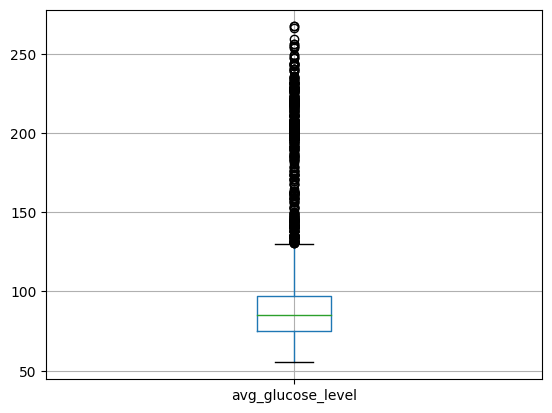

In [11]:
data = stroke_df[['avg_glucose_level']].boxplot(return_type='dict')
out = data['fliers'][0].get_data()[1]
df_out_glucose=pd.DataFrame({'Outliers': out}).astype(int)
df_out_glucose

## Outliers bmi

In [12]:
bmi_ = stroke_df['bmi'].describe()[['mean','std','25%', '50%', '75%']].reset_index()
print(bmi_)

  index        bmi
0  mean  28.112721
1   std   6.722315
2   25%  23.500000
3   50%  27.600000
4   75%  32.000000


,Outliers
count,251.000000
mean,48.816733
std,6.508324
min,10.000000
25%,45.000000
50%,48.000000
75%,52.000000
max,80.000000


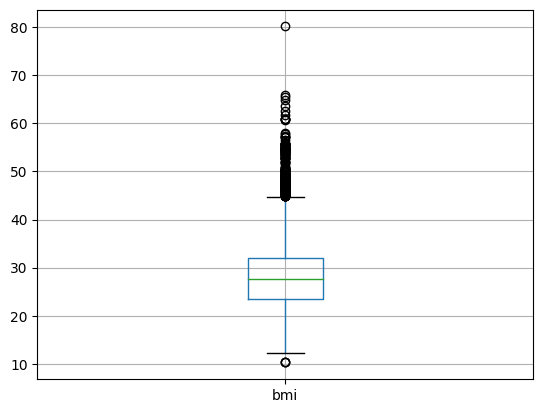

In [13]:
data = stroke_df[['bmi']].boxplot(return_type='dict')
out = data['fliers'][0].get_data()[1]
df_out_bmi=pd.DataFrame({'Outliers': out}).astype(int)
df_out_bmi.describe()

*A quantidade de Outliers que temos na base pode ser um problema para o modelo*

## Colunas categóricas

C:\Users\User\AppData\Local\Temp\ipykernel_6076\3214135006.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


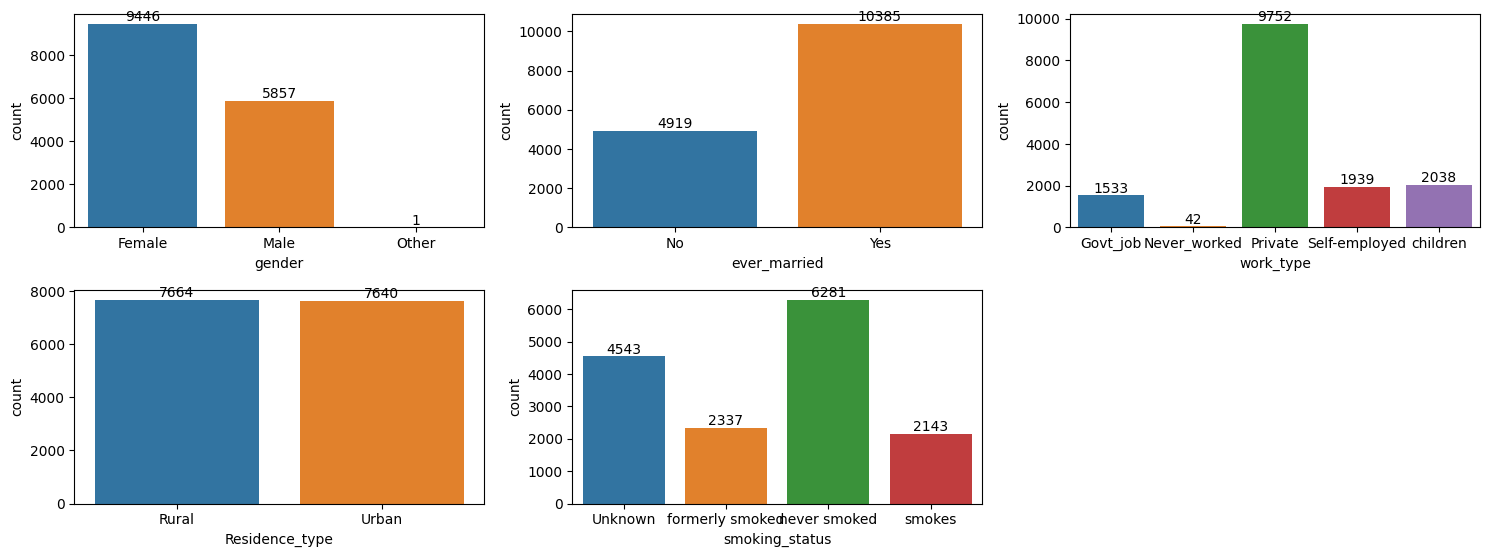

In [14]:
categoric_columns = stroke_df.select_dtypes(exclude=['number'])

plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 3, number)
    ax = sns.countplot(x=i, data=stroke_df)
    ax.bar_label(ax.containers[0])
    number += 1
    plt.tight_layout()
plt.show()   

*Supondo que Smoking_status é importante para detecção de AVC, tempos um problema pois temos 4500 linhas com infromação desconhecida*

## Retirando a linha referente ao gênero = Other

In [15]:
stroke_df[stroke_df.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9363,Other,9,0,0,No,children,Rural,96.04,18.0,Unknown,0


In [16]:
stroke_df = stroke_df.drop(9363)

In [17]:
for i in categoric_columns:
    formatted_values = (stroke_df[i].value_counts(normalize=True)*100).apply(lambda x: f'{x:.2f}%')
    print(formatted_values)
    print('------------------------------')   

gender
Female    61.73%
Male      38.27%
Other      0.00%
Name: proportion, dtype: object
------------------------------
ever_married
Yes    67.86%
No     32.14%
Name: proportion, dtype: object
------------------------------
work_type
Private          63.73%
children         13.31%
Self-employed    12.67%
Govt_job         10.02%
Never_worked      0.27%
Name: proportion, dtype: object
------------------------------
Residence_type
Rural    50.08%
Urban    49.92%
Name: proportion, dtype: object
------------------------------
smoking_status
never smoked       41.04%
Unknown            29.68%
formerly smoked    15.27%
smokes             14.00%
Name: proportion, dtype: object
------------------------------


## Análise do Target

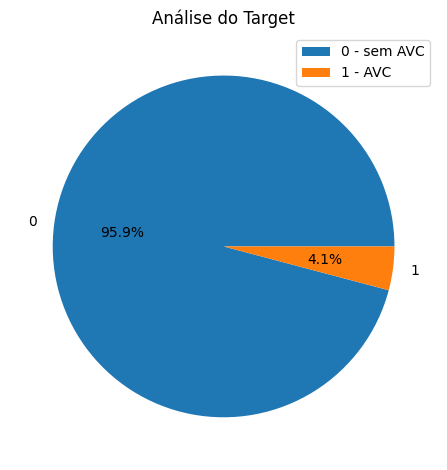

In [18]:
stroke_df.groupby('stroke').size().plot(kind='pie', autopct='%.1f%%')
legend_labels = ['0 - sem AVC', '1 - AVC']
plt.legend(legend_labels, loc='best')
plt.title('Análise do Target')
plt.ylabel("")
plt.tight_layout()
plt.show()   

In [19]:
stroke_df['stroke'].value_counts()

stroke
0    14671
1      632
Name: count, dtype: int64

*Notamos que apenas 4.1% dos dados, 632 de 15.303, são com positivo para AVC, o que parece ser um comportamento que se repete nas análises de doenças, visto que em uma população a quantidade de pessoas com determinada doença é peqeuna*

## Filtrando os dados com AVC

In [20]:
stroke_df_1 = stroke_df[stroke_df['stroke'] != 0]

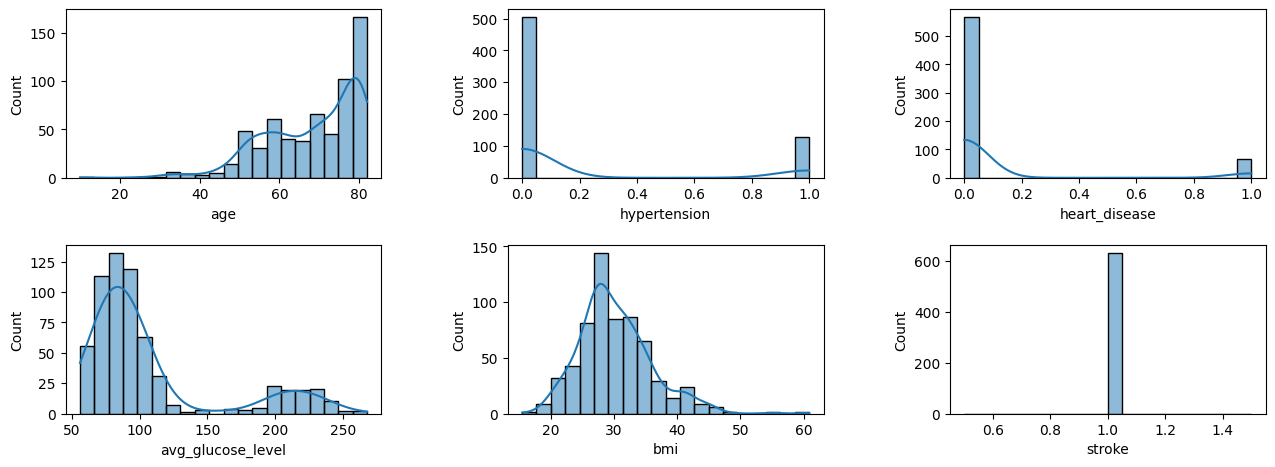

In [21]:
numeric_columns = stroke_df_1.select_dtypes(include=['number'])

plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.histplot(data=stroke_df_1, x=stroke_df_1[i], kde=True, bins=20) 
    number += 1
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()  


*Notamos que as pessoas mais velhas tem maior tendencia de ter o AVC, temos uma faixa a ser considerada em pessoas que tem a glicose alta*

C:\Users\User\AppData\Local\Temp\ipykernel_6076\3316128957.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


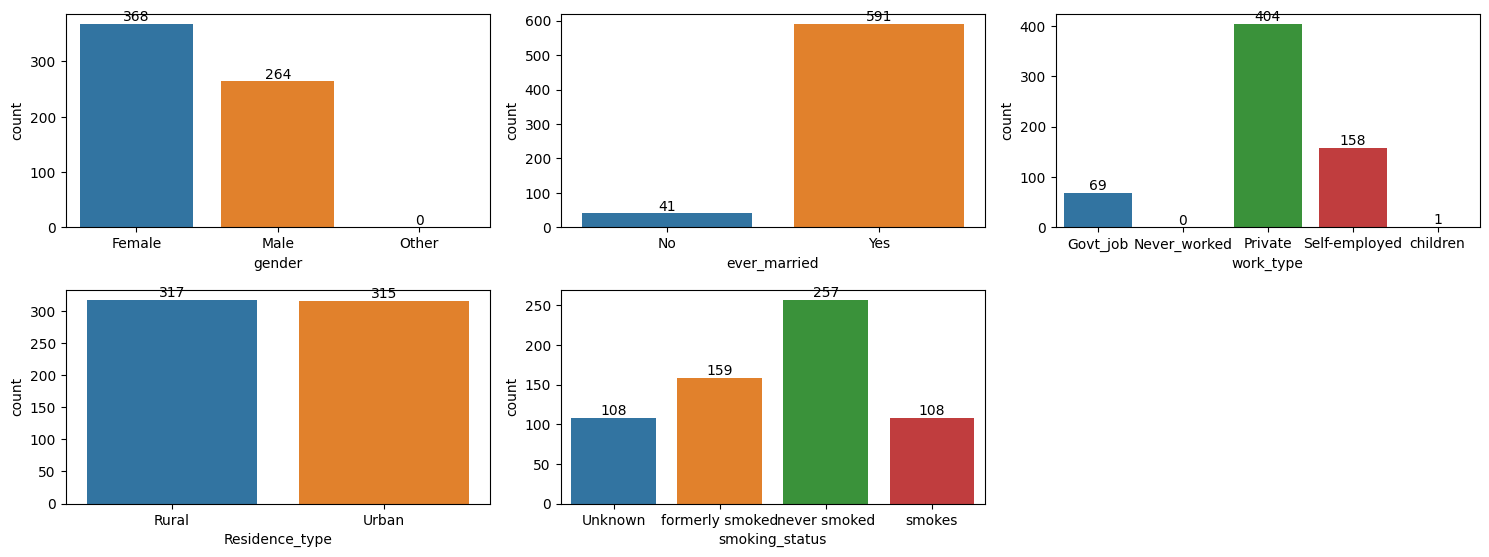

In [22]:
categoric_columns = stroke_df_1.select_dtypes(exclude=['number'])

plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 3, number)
    ax = sns.countplot(x=i, data=stroke_df_1)
    ax.bar_label(ax.containers[0])
    number += 1
    plt.tight_layout()
plt.show()       

In [189]:
for i in categoric_columns:
    formatted_values = (stroke_df_1[i].value_counts(normalize=True)*100).apply(lambda x: f'{x:.2f}%')
    print(formatted_values)
    print('------------------------------')   

gender
Female    58.23%
Male      41.77%
Other      0.00%
Name: proportion, dtype: object
------------------------------
ever_married
Yes    93.51%
No      6.49%
Name: proportion, dtype: object
------------------------------
work_type
Private          63.92%
Self-employed    25.00%
Govt_job         10.92%
children          0.16%
Never_worked      0.00%
Name: proportion, dtype: object
------------------------------
Residence_type
Rural    50.16%
Urban    49.84%
Name: proportion, dtype: object
------------------------------
smoking_status
never smoked       40.66%
formerly smoked    25.16%
Unknown            17.09%
smokes             17.09%
Name: proportion, dtype: object
------------------------------


### Caso decidamos por eliminar os Outiliers

## Eliminando Outliers das colunas - Avg_glicose e bmi

In [31]:
print('inicio:',len(stroke_df))

filtro = np.array([True] * len(stroke_df))
for col in ['avg_glucose_level','bmi']:
    Q1 = stroke_df[col].quantile(0.25)
    Q3 = stroke_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inf = Q1 - (IQR * 1.5)
    
    limite_sup = Q3 + (IQR * 1.5)

    filtro = ((stroke_df[col] >= limite_inf) & (stroke_df[col] <= limite_sup)) & filtro
    
stroke_df_s = stroke_df[filtro]

print('fim:', len(stroke_df_s))

inicio: 15303
fim: 14541


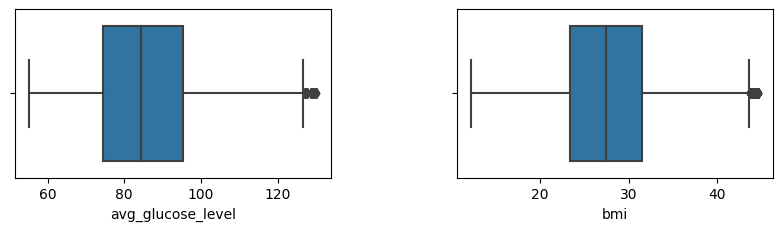

In [24]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in ['avg_glucose_level','bmi']:
    plt.subplot(row, 3, number)
    sns.boxplot(x=i, data=stroke_df_s)
    number += 1
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.show()

## Correlação sem os Outliers

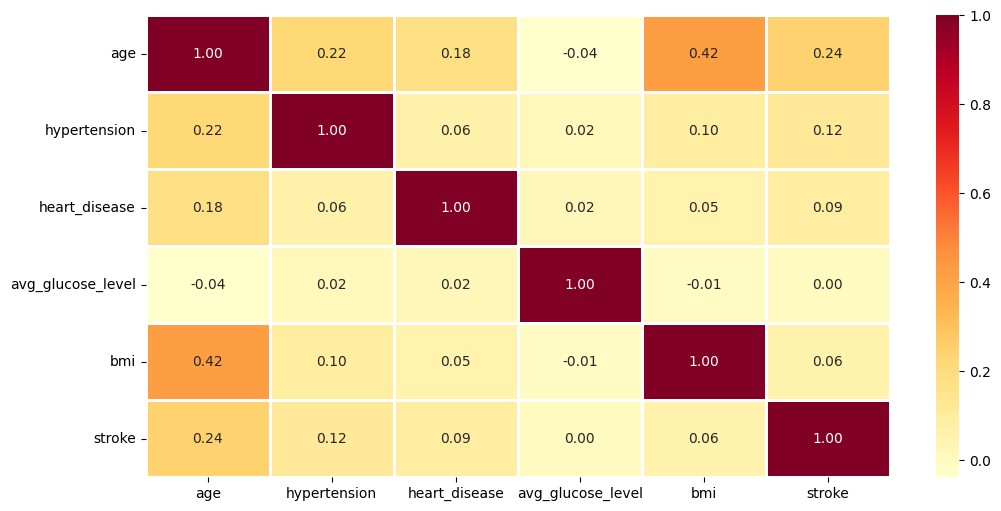

In [25]:
numeric_columns = stroke_df_s.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_columns.corr(),
            cmap='YlOrRd',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()

## Transformando os valores categóricos em numéricos

In [26]:
cat_df = stroke_df[['gender', 'ever_married','work_type', 'Residence_type','smoking_status']]
cat_df1 = cat_df.apply(lambda x : x.cat.codes)
cat_df1.head(10)

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,2
1,1,1,2,0,1
2,0,1,2,0,0
3,1,1,2,1,2
4,0,0,2,0,2
5,0,1,2,1,0
6,0,1,2,0,2
7,1,1,3,0,0
8,0,1,2,0,2
9,0,1,0,1,1


In [27]:
import json

mapeamento_categoria_numero = {}
for col in cat_df.columns:
    categorias_unicas = cat_df[col].unique()
    numeros_correspondentes = cat_df1[col].unique()
    mapeamento_categoria_numero[col] = dict(zip(categorias_unicas, numeros_correspondentes))
    

for col, mapeamento in mapeamento_categoria_numero.items():
    print(col)
    for categoria, numero in mapeamento.items():
        print(f"  Valor: {categoria}, Número: {numero}")
  

gender
  Valor: Male, Número: 1
  Valor: Female, Número: 0
ever_married
  Valor: Yes, Número: 1
  Valor: No, Número: 0
work_type
  Valor: Private, Número: 2
  Valor: Self-employed, Número: 3
  Valor: Govt_job, Número: 0
  Valor: children, Número: 4
  Valor: Never_worked, Número: 1
Residence_type
  Valor: Urban, Número: 1
  Valor: Rural, Número: 0
smoking_status
  Valor: never smoked, Número: 2
  Valor: formerly smoked, Número: 1
  Valor: Unknown, Número: 0
  Valor: smokes, Número: 3


In [28]:
stroke_df[cat_df1.columns] = cat_df1.copy()
stroke_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,28,0,0,1,2,1,79.53,31.1,2,0
1,1,33,0,0,1,2,0,78.44,23.9,1,0
2,0,42,0,0,1,2,0,103.00,40.3,0,0
3,1,56,0,0,1,2,1,64.87,28.8,2,0
4,0,24,0,0,0,2,0,73.36,28.8,2,0
5,0,34,0,0,1,2,1,84.35,22.2,0,0
6,0,53,0,0,1,2,0,88.97,25.3,2,0
7,1,78,0,1,1,3,0,75.32,24.8,0,0
8,0,45,0,0,1,2,0,107.22,34.1,2,0
9,0,62,0,0,1,0,1,62.68,18.4,1,0


*Após este passo rodei de novo a célula para gerar o Dataframe sem Outliers de novo com as categorias numéricas*

## Salvando arquivo para aplicar os modelos

### Arquivo completo com Outiliers e todas as colunas

In [35]:
stroke_df.to_csv('stroke_df_completo', index=False)
stroke_df_s.to_csv('stroke_df_sem_out', index=False)

### Caso decidamos por categorizar as colunas bmi e glicose, por possuirem muitos Outliers

## Categorizando as colunas de bmi e glicose

In [36]:
# Limites para a glicose
limite_normal = 100
limite_prediabetico = 126

def categorizar_glicose(valor):
    if valor <= limite_normal:
        return 'Normal'
    elif valor <= limite_prediabetico:
        return 'Pre-Diabetico'
    else:
        return 'Diabetico'


stroke_df['avg_glucose_level'] = stroke_df['avg_glucose_level'].apply(categorizar_glicose)

In [37]:
def categorizar_bmi(bmi):
    if bmi < 18.50:
        return 'Abaixo do Peso'
    elif 18.50 <= bmi < 25.00:
        return 'Peso Normal'
    elif 25.00 <= bmi < 30.00:
        return 'Pre-Obesidade'
    elif 30.00 <= bmi < 35.00:
        return 'Obesidade Grau I'
    elif 35.00 <= bmi < 40.00:
        return 'Obesidade Grau II'
    else:
        return 'Obesidade Grau III'

stroke_df['bmi'] = stroke_df['bmi'].apply(categorizar_bmi)

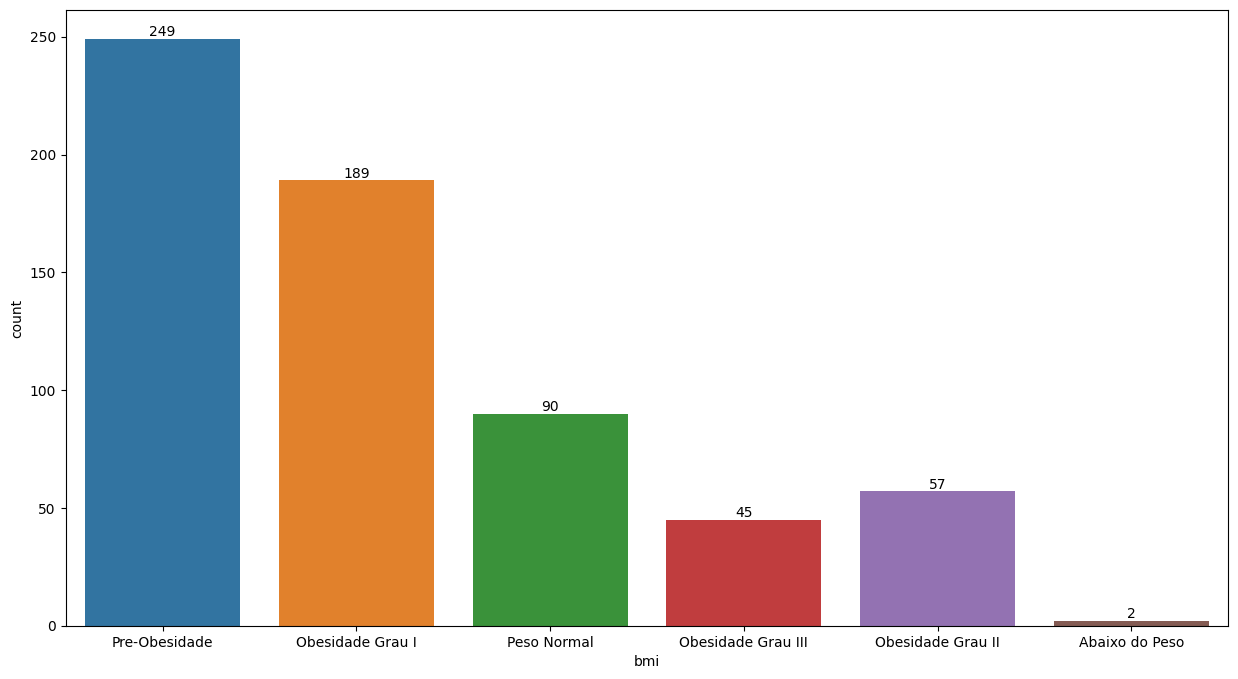

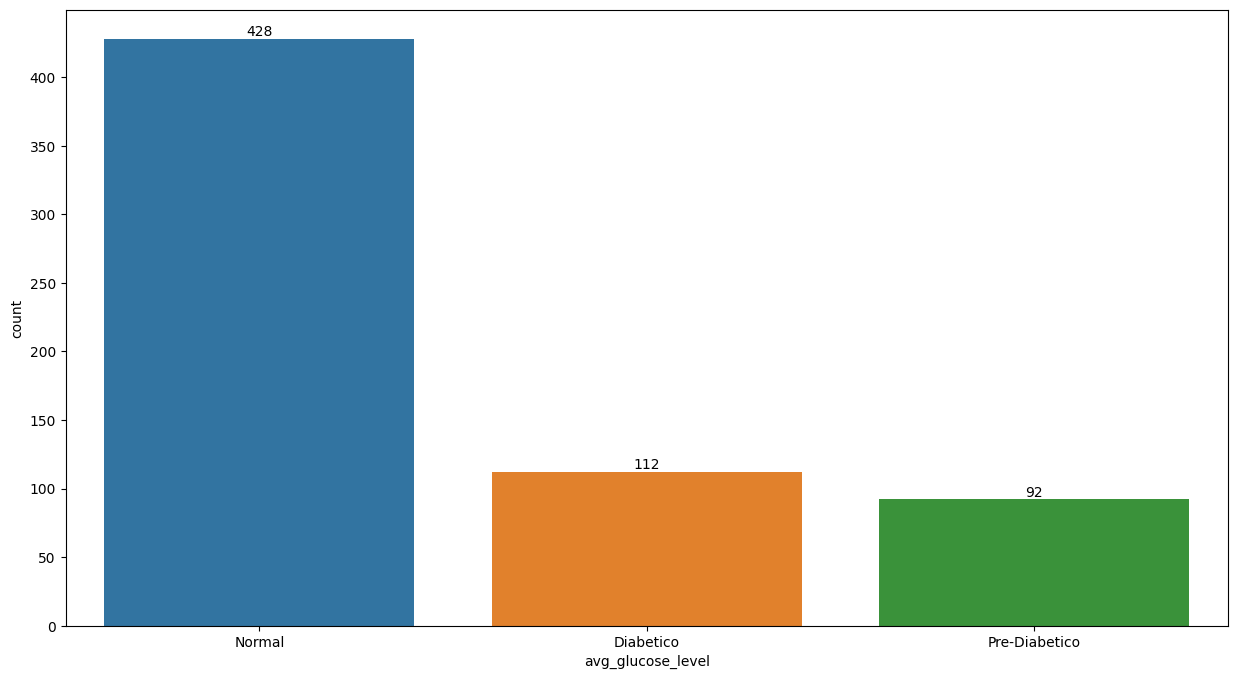

In [38]:
stroke_df_1 = stroke_df[stroke_df['stroke'] != 0]
plt.figure(figsize = (15, 8))
ax = sns.countplot(x=stroke_df_1['bmi'], data=stroke_df_1['bmi'])
ax.bar_label(ax.containers[0])
plt.show()


plt.figure(figsize = (15, 8))
ax = sns.countplot(x=stroke_df_1['avg_glucose_level'], data=stroke_df_1['avg_glucose_level'])
ax.bar_label(ax.containers[0])
plt.show() 

## Transformando os valores categóricos em numéricos

In [39]:
stroke_df['bmi'] = stroke_df['bmi'].astype('category')
stroke_df['avg_glucose_level'] = stroke_df['avg_glucose_level'].astype('category')

In [41]:
cat_df = stroke_df[['avg_glucose_level','bmi']]
cat_df1 = cat_df.apply(lambda x : x.cat.codes)
cat_df1.head(10)

,avg_glucose_level,bmi
0,1,1
1,1,4
2,2,3
3,1,5
4,1,5
5,1,4
6,1,5
7,1,4
8,2,1
9,1,0


In [43]:
import json

mapeamento_categoria_numero = {}
for col in cat_df.columns:
    categorias_unicas = cat_df[col].unique()
    numeros_correspondentes = cat_df1[col].unique()
    mapeamento_categoria_numero[col] = dict(zip(categorias_unicas, numeros_correspondentes))
    

for col, mapeamento in mapeamento_categoria_numero.items():
    print(col)
    for categoria, numero in mapeamento.items():
        print(f"  Valor: {categoria}, Número: {numero}")

avg_glucose_level
  Valor: Normal, Número: 1
  Valor: Pre-Diabetico, Número: 2
  Valor: Diabetico, Número: 0
bmi
  Valor: Obesidade Grau I, Número: 1
  Valor: Peso Normal, Número: 4
  Valor: Obesidade Grau III, Número: 3
  Valor: Pre-Obesidade, Número: 5
  Valor: Abaixo do Peso, Número: 0
  Valor: Obesidade Grau II, Número: 2


In [44]:
stroke_df[cat_df1.columns] = cat_df1.copy()
stroke_df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,28,0,0,1,2,1,1,1,2,0
1,1,33,0,0,1,2,0,1,4,1,0
2,0,42,0,0,1,2,0,2,3,0,0
3,1,56,0,0,1,2,1,1,5,2,0
4,0,24,0,0,0,2,0,1,5,2,0
5,0,34,0,0,1,2,1,1,4,0,0
6,0,53,0,0,1,2,0,1,5,2,0
7,1,78,0,1,1,3,0,1,4,0,0
8,0,45,0,0,1,2,0,2,1,2,0
9,0,62,0,0,1,0,1,1,0,1,0


In [45]:
stroke_df.to_csv('stroke_df_cat', index=False)